In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
data_path = 'trial1/'
file = open(data_path + 'estimation_data.pickle', 'rb')
data = pickle.load(file)
file.close()

In [4]:
true_mass = np.load(data_path + 'true-mass.npy')
true_damping = np.load(data_path + 'true-damping.npy')
mass = []
damping = []
mass_variance = []
damping_variance = []
for i in range(len(data)):
    mass.append(
            data[i]['mean mass']
    )
    damping.append(
        data[i]['mean dof damping']
    )
    diag_var = np.diag(data[i]['var'])
    damping_variance.append(
        np.sqrt(diag_var[:6])
    )
    mass_variance.append(
        np.sqrt(diag_var[6:])
    )

## make this into a numpy array
mass = np.array(mass)
mass_variance = np.array(mass_variance)
damping = np.array(damping)
damping_variance = np.array(damping_variance)

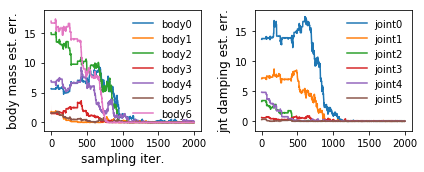

In [7]:
sampling_iter = [i for i in range(len(mass))]
mass_err = np.square(mass - true_mass)
num_masses = mass.shape[1]

plt.figure(figsize=(6,2.5))

ax = plt.subplot(1,2,1)

for i in range(num_masses):
    ax.plot(sampling_iter, mass_err[:,i], label='body{}'.format(i))
    ax.fill_between(sampling_iter, 
                    mass_err[:,i] - 2.0 * mass_variance[:,i],
                    mass_err[:,i] + 2.0 * mass_variance[:,i],
                    alpha=0.2)

ax.set_xlabel('sampling iter.', fontsize=12)
ax.set_ylabel('body mass est. err.', fontsize=12)
ax.legend(framealpha=0.)

ax = plt.subplot(1,2,2)

sampling_iter = [i for i in range(len(damping))]
damping_err = np.square(damping - true_damping)
num_dampeners = damping.shape[1]
for i in range(num_dampeners):
    ax.plot(sampling_iter, damping_err[:,i], label='joint{}'.format(i))
    ax.fill_between(sampling_iter, 
                    damping_err[:,i] - 2.0 * damping_variance[:,i],
                    damping_err[:,i] + 2.0 * damping_variance[:,i],
                    alpha=0.2)
ax.set_ylabel('jnt damping est. err.', fontsize=12)
ax.legend(framealpha=0.)

plt.tight_layout()

plt.savefig('half-cheetah-estimate.pdf')

